In [201]:
import os
import sklearn
import pandas as pd
import numpy as np
os.chdir("/Users/nafis/Downloads/ML/Untitled Folder")
Train=pd.read_csv("Train.csv")

print(f"data_shape: {np.shape(Train)}")
print(f"earliest date: {np.max(Train).date}")
print(f"latest date: {np.min(Train).date}")
print(f"MAx train: {np.max(Train)}")
print(f"Max train: {np.min(Train)}")

Number_data_points = 14937
Number_Training_data=round(Number_data_points*0.7)
print(Number_Training_data)
print(Number_data_points-Number_Training_data)

Test=pd.read_csv("Test.csv")
print(f"data_shape: {np.shape(Test)}")
print(f"earliest date: {np.max(Test).date}")
print(f"latest date: {np.min(Test).date}")
print(f"MAx train: {np.max(Test)}")
print(f"Max train: {np.min(Test)}")

NTr=len(Train)
NTs=len(Test)
print(NTr)
print(NTs)

data_shape: (10456, 8)
earliest date: 20050112.0
latest date: 19630701.0
MAx train: date      2.005011e+07
Mkt-RF    8.570000e+00
SMB       6.170000e+00
HML       3.480000e+00
RMW       4.520000e+00
CMA       2.530000e+00
RF        6.100000e-02
Mkt       8.597000e+00
dtype: float64
Max train: date      1.963070e+07
Mkt-RF   -1.744000e+01
SMB      -1.119000e+01
HML      -4.330000e+00
RMW      -3.010000e+00
CMA      -5.870000e+00
RF        3.000000e-03
Mkt      -1.741300e+01
dtype: float64
10456
4481
data_shape: (4481, 8)
earliest date: 20221031.0
latest date: 20050113.0
MAx train: date      2.022103e+07
Mkt-RF    1.135000e+01
SMB       5.730000e+00
HML       6.740000e+00
RMW       4.210000e+00
CMA       2.460000e+00
RF        2.200000e-02
Mkt                NaN
dtype: float64
Max train: date      20050113.00
Mkt-RF         -12.00
SMB             -4.56
HML             -5.00
RMW             -2.72
CMA             -2.26
RF               0.00
Mkt               NaN
dtype: float64
10456
4481


/Users/nafis/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/nafis/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/nafis/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/nafis/opt/anaconda

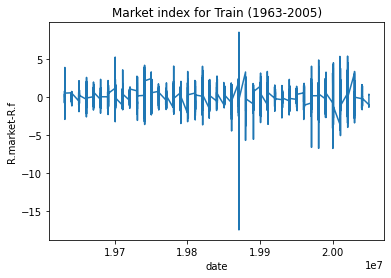

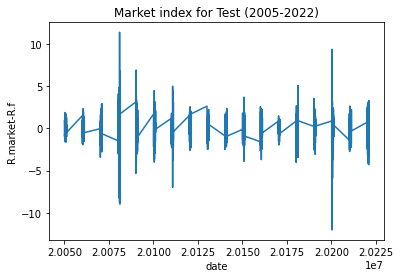

In [202]:
import matplotlib.pyplot as plt
x = list(Train['date'])
X = Train[['SMB', 'HML', 'RMW', 'CMA']]
Y = Train['Mkt-RF']

plt.plot(x, Y)
plt.xlabel('date')
plt.ylabel('R.market-R.f')
plt.title('Market index for Train (1963-2005)')
plt.show()


x2 = list(Test['date'])
X2 = Test[['SMB', 'HML', 'RMW', 'CMA']]
Y2 = Test['Mkt-RF']


plt.plot(x2, Y2)
plt.xlabel('date')
plt.ylabel('R.market-R.f')
plt.title('Market index for Test (2005-2022)')
plt.show()

In [203]:
### OLS on the train data

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn import linear_model
#Linear Regression:
#Lin_reg = linear_model.LinearRegression()
Lin_reg = linear_model.LinearRegression()
Lin_reg.fit(X,Y)
print(f"intercept of linear regression is: {Lin_reg.intercept_}\n")
print(f"coefs of linear regression are: {Lin_reg.coef_} \n")

r_squared = Lin_reg.score(X, Y)

#view R-squared value
print(r_squared)

intercept of linear regression is: 0.05849258116561065

coefs of linear regression are: [-0.59383317 -0.85900705 -0.49476356 -0.31596101] 

0.42512798111174854


In [204]:
# Cross validation and scoring on OLS

scores = cross_val_score(Lin_reg, X, Y, cv=20, scoring='neg_root_mean_squared_error')
print(f"mean of CV_scores of OLS (-MSE)= {np.mean(scores):.5f}")

scores = cross_val_score(Lin_reg, X, Y, cv = 20)
avg_cross_val_score = mean(scores)*100
print(f"mean of CV_scores of OLS (R^2)= {avg_cross_val_score:.5f} %")

mean of CV_scores of OLS (-MSE)= -0.67228
mean of CV_scores of OLS (R^2)= 30.23142 %


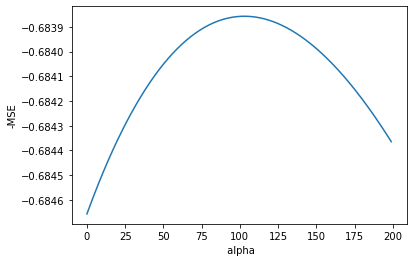

In [82]:
# L2-regression (Ridge) , for different values of alphas
A=np.arange(0,200,1)
Output=[]
for i in range(0, 200):
    ridgereg=Ridge(alpha=i*1)
    ridgereg.fit(X,Y)
    scores1 = cross_val_score(ridgereg, X, Y, cv=20, scoring='neg_root_mean_squared_error')
    #print(f"mean of CV_scores of Ridge (-MSE) with alpha {i*0.5} = {np.mean(scores1):.5f}")
    scores2 = cross_val_score(ridgereg, X, Y, cv = 20)
    avg_cross_val_score = mean(scores2)*100
    Output.append(np.mean(scores1))
plt.plot(A,Output)
plt.xlabel(" alpha")
plt.ylabel("-MSE")
plt.show()

## ### As seen in the graph, in Ridge model at alpha=100 score which is negative of MSE is the MAX.

intercept of Lasso model for alpha 0.01 is: 0.04448020764945089
coefs of Lasso model for alpha 0.01 are: [-0.31415042 -0.80789195 -0.06182029 -0.06095447]


/var/folders/cn/4qrmcmk53j95s2pb32bdmjjw0000gn/T/ipykernel_48549/3044243458.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X,Y)
/Users/nafis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/nafis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.464e+03, tolerance: 8.573e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.ene

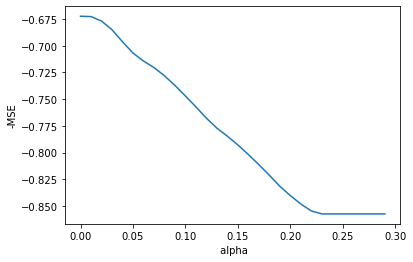

In [205]:
# L2-regression (Lasso) , for different values of lambdas
lasso=Lasso(alpha=0.05)
lasso.fit(X,Y)
print(f"intercept of Lasso model for alpha {0.01} is: {lasso.intercept_}")
print(f"coefs of Lasso model for alpha {0.01} are: {lasso.coef_}")

A=np.arange(0,0.3,0.01)
Output=[]
for i in range(0, 30):
    lasso=Lasso(alpha=i*0.01)
    lasso.fit(X,Y)
    scores1 = cross_val_score(lasso, X, Y, cv=20, scoring='neg_root_mean_squared_error')
    #print(f"mean of CV_scores of Ridge (-MSE) with alpha {i*0.5} = {np.mean(scores1):.5f}")
    scores2 = cross_val_score(lasso, X, Y, cv = 20)
    avg_cross_val_score = mean(scores2)*100
    Output.append(np.mean(scores1))
plt.plot(A,Output)
plt.xlabel(" alpha")
plt.ylabel("-MSE")
plt.show()


In [250]:
#selected model & its R2


ridgereg.fit(X,Y)
prediction_Y =ridgereg.predict(X)
R2_train=1-np.sum((prediction_Y -Y)**2)/np.sum((np.mean(Y)-Y)**2)
print(f"R2train={np.round(R2_train*100)}")
bias=ridgereg.intercept_
coef=ridgereg.coef_
print(coef)
#print(np.asarray(X2))
prediction_Ytest1=np.asarray(X2)*coef
prediction_Ytest2=np.sum(prediction_Ytest1,axis=1)+bias
#Y2=np.asarray(Y2)
print(prediction_Ytest2)
#np.shape(Y2)
#np.shape(prediction_Ytest)
R2_test=1-np.sum((prediction_Ytest2-Y2)**2)/np.sum((Y2)**2)
print(R2_test)

#print(f"intercept of selectd model on training is: {ridgereg.intercept_}\n")
#print(f"coefs of linear regression on training are: {ridgereg.coef_} \n")

R2train=42.0
[-0.56640805 -0.81325756 -0.45644201 -0.33505812]
[-0.42680462 -0.22336868  0.20951258 ... -1.04599929 -0.06925481
 -0.88408916]
-0.6969412983591095


In [199]:
X2_No_SMB= Test[[ 'HML', 'RMW', 'CMA']]
ridgereg.fit(X2_No_SMB,Y2)
prediction_Ytest_NO_SMB =ridgereg.predict(X2_No_SMB)
np.sqrt(np.mean((prediction_Ytest_NO_SMB - Y2) ** 2))
R2_NO_SMB=1-np.sum((prediction_Ytest_NO_SMB -Y2)**2)/np.sum((np.mean(Y2)-Y2)**2)
print(R2_NO_SMB*100)
a=(R2_1-R2_NO_SMB)*100
print(f"Decrease in R2 due to _NO_SMB={(R2-R2_NO_SMB)*100} base points")



18.226554712701382
Decrease in R2 due to _NO_SMB=1.7419496966087133 base points


In [200]:
X2_No_HML= Test[[ 'SMB', 'RMW', 'CMA']]
ridgereg.fit(X2_No_HML,Y2)
prediction_Ytest_NO_HML =ridgereg.predict(X2_No_HML)
np.sqrt(np.mean((prediction_Ytest_NO_HML - Y2) ** 2))
R2_NO_HML=1-np.sum((prediction_Ytest_NO_HML -Y2)**2)/np.sum((np.mean(Y2)-Y2)**2)
print(R2_NO_HML*100)
a=(R2_1-R2_NO_HML)*100
print(f"Decrease in R2 due to _NO_HML={(R2-R2_NO_HML)*100} base points")



12.899435054485476
Decrease in R2 due to _NO_HML=7.06906935482462 base points


In [162]:
X2_No_RMW= Test[[ 'SMB', 'HML', 'CMA']]
ridgereg.fit(X2_No_RMW,Y2)
prediction_Ytest_NO_RMW =ridgereg.predict(X2_No_RMW)
np.sqrt(np.mean((prediction_Ytest_NO_RMW - Y2) ** 2))
R2_NO_RMW=1-np.sum((prediction_Ytest_NO_RMW -Y2)**2)/np.sum((np.mean(Y2)-Y2)**2)
print(R2_NO_RMW*100)
a=(R2_1-R2_NO_RMW)*100
print(f"Decrease in R2 due to _NO_RMW={(R2-R2_NO_RMW)*100} base points")



16.83972438437277
Decrease in R2 due to _NO_RMW=3.1287800249373277 base points


In [163]:
X2_No_CMA= Test[[ 'SMB', 'HML', 'RMW']]
ridgereg.fit(X2_No_CMA,Y2)
prediction_Ytest_NO_CMA =ridgereg.predict(X2_No_CMA)
np.sqrt(np.mean((prediction_Ytest_NO_CMA - Y2) ** 2))
R2_NO_CMA=1-np.sum((prediction_Ytest_NO_CMA -Y2)**2)/np.sum((np.mean(Y2)-Y2)**2)
print(R2_NO_CMA*100)
a=(R2_1-R2_NO_CMA)*100
print(f"Decrease in R2 due to _NO_CMA={(R2-R2_NO_CMA)*100} base points")

13.33562828706455
Decrease in R2 due to _NO_CMA=6.632876122245546 base points
